In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('C:\\insurance.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#checking for null item
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
#using dictionary
#to replace the value
#find and replace
data['sex']=data['sex'].map({'male':1,'female':2})

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [8]:
#dictionary work
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [9]:
#same same
data['region']=data['region'].map({'northeast':1,'northwest':2,'southeast':3,'southwest':4})

In [10]:
data.groupby('region').count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
1,324,324,324,324,324,324
2,325,325,325,325,325,325
3,364,364,364,364,364,364
4,325,325,325,325,325,325


In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,4,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [12]:
#X as a independent variable to hold independent value
X=data.drop('charges',axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,2,27.900,0,1,4
1,18,1,33.770,1,0,3
2,28,1,33.000,3,0,3
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,2,31.920,0,0,1
1335,18,2,36.850,0,0,3
1336,21,2,25.800,0,0,4


In [13]:
y=data['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
#size taken as ? out of 1
#that represents the portion to take in the test i.e. test size
#rand_state is the seed value to choose the data randomly used to suffle data on regular pattern
#X_train,X_test,y_train,y_test should be wriiten in this order. 
#can not rearrange it randomly
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
#linear regression for linear equation
from sklearn.linear_model import LinearRegression
#svr coverage in mainly non linear like finance,stock price prediction, weather forecasting
from sklearn.svm import SVR #support vector regression & support vector machine
#svr for discrete
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor


In [17]:
#pattern  can't be changed
#obect is created for each algorithm to store coefficient of determination
lr=LinearRegression()
lr.fit(X_train,y_train)
svm=SVR()
svm.fit(X_train,y_train)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [18]:
#predicting the value using test value while applying to the equation gained from train sample
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gr.predict(X_test)

In [19]:
#using dictionary to store variety data types
#to assign value in the key for ease access
#storing in df1 dataframe
df1=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [20]:
df1

,Actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9547.992057,10049.705756,11001.128629
887,5272.17580,7116.295018,9491.687741,5233.240697,5840.174656
890,29330.98315,36909.013521,9649.272718,28233.512749,28001.980112
1293,9301.89355,9507.874691,9554.843448,10098.969007,9745.291602
259,33750.29180,27013.350008,9419.248093,34410.952409,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9649.441682,47308.712394,45431.423211
575,12222.89830,11814.555568,9625.860790,12365.535369,12465.025294
535,6067.12675,7638.107736,9503.453442,6431.998356,6974.336525
543,63770.42801,40959.081722,9605.169787,46666.860049,47862.047791


In [21]:
import matplotlib.pyplot as plt

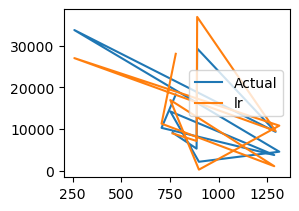

In [22]:
#subplot(row,column,subplot)
#subplot use for multiple result analyzing on same frame
#plt.plot for line plot using matplotlib library
#.iloc for restricting the data size
#plt.legend() create a box that contain description of the plot
#label used as hue
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label="lr")
plt.legend()

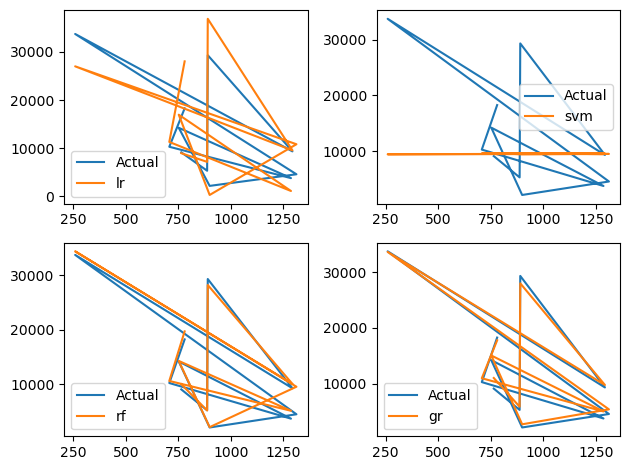

In [23]:
#subplot(row,column,subplot)
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label="lr")
plt.legend()
plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.tight_layout()
plt.legend()

In [24]:
from sklearn import metrics
#metrics is a module of sklearnlibrary
#evaluate the performance of the machine learning model
#classification accuracy, precision, recall, and F1-score

In [25]:
#coefficient of determination as r2
#calculate r-squared value
#test how well the predicted value is fitted
#1 represents best fit where 0 as poor fit
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [26]:
print(score1,score2,score3,score4)

0.7833463107364538 -0.07228563981014346 0.862846814299371 0.8779936181637191


In [27]:
#dictionary
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region':2}

In [28]:
#index is must if dictionary has scalar values
#not needed if array of dictionary values
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [29]:
new_pred=gr.predict(df)
print(new_pred)

[44056.94377026]


In [30]:
new_pred

array([44056.94377026])

In [31]:
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  44056.94377026014


In [32]:
gr=GradientBoostingRegressor()
gr.fit(X,y)#here X and y means taking all data as train data

GradientBoostingRegressor()

In [33]:
import joblib
#to load and save model or object

In [34]:
#dump saves an object to a file.
joblib.dump(gr,'Model_Joblib_gr')

['Model_Joblib_gr']

In [35]:
#Loads an object from a file.
model=joblib.load('Model_Joblib_gr')

In [36]:
model.predict(df)

array([43296.46435835])

In [37]:
#extra dose

In [38]:

data = [{'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region':2},
        {'age' : 30,
        'sex' : 2,
        'bmi' : 45.30,
        'children' : 3,
        'smoker' : 0,
        'region':3}]

df = pd.DataFrame(data)
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2
1,30,2,45.3,3,0,3


In [39]:
#it is same as gr is changed(up) and same for both below
#
new_pred=gr.predict(df)
print(new_pred)

[43296.46435835  5710.71348483]


In [40]:
gr=GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [41]:
joblib.dump(gr,'Model_Joblib_gr')

['Model_Joblib_gr']

In [42]:
model=joblib.load('Model_Joblib_gr')

In [43]:
model.predict(df)

array([43296.46435835,  5710.71348483])